## **Detección de Fraude en Canastas de Compra mediante Árboles de Decisión**

### **Justifique la elección del algoritmo y los parámetros utilizados**

##### Árbol de Decisión (DecisionTreeClassifier) para la Detección de Fraude

###### **Introducción**
Los árboles de decisión son modelos ampliamente utilizados para la detección de fraude debido a su capacidad de interpretar patrones en los datos.

######  **Interpretabilidad**

-  **Variables Clave Identificadas**
El análisis de importancia de características resalta las variables más influyentes en la detección de fraude. Entre ellas:

 **Características más relevantes**:
 - **`FULFILMENT CHARGE | RETAILER`** → La característica con mayor impacto.
  - **Costos de los ítems** → Incluye:
  - Costo total
  - Costo medio por ítem
  - Costo máximo por ítem

***Conclusión**
El uso de árboles de decisión en la detección de fraude ofrece ventajas clave:
 **Interpretabilidad:** Permite visualizar reglas claras.
**Identificación de patrones clave:** Prioriza variables relevantes en la clasificación de fraudes




##### **Parámetros Utilizados en Árboles de Decisión**


| Parámetro            | Descripción |
|----------------------|-------------|
| **`criterion`**      | Métrica de división: `"entropy". |
| **`max_depth`**      | Profundidad máxima del árbol. |
| **`min_samples_split`** | Mínimo de muestras para dividir un nodo. |
| **`min_samples_leaf`**  | Mínimo de muestras en un nodo hoja. |
| **`max_features`**   | Número de características en cada división. |
| **`class_weight`**   | Ajusta el peso de las clases desbalanceadas. |
| **`random_state`**   | Semilla para reproducibilidad. |

-----------------

### Evaluación Del Modelo

#### **Métricas Clave del Modelo (Árbol de Decisión)**

##### **Exactitud**

- **Entrenamiento**: 92.18% → Buen ajuste a los datos de entrenamiento.
- **Prueba**: 88.41% → Desempeño aceptable, pero con posible sobreajuste.

*****

##### **Matriz de Confusión Inicial**

| **Real / Predicho**  | **No Fraude (Predicho)** | **Fraude (Predicho)** |
|----------------------|------------------------|-----------------------|
| **No Fraude (Real)** | 1593 TN                 | 27 FP                 |
| **Fraude (Real)**    | 197 FN                  | 47 TP                 |

##### **Observaciones:**
- 1593 TN → Transacciones legítimas correctamente clasificadas.
- 47 TP → Fraudes detectados correctamente.
- 27 FP → Falsas alarmas (transacciones legítimas clasificadas como fraude).
- 197 FN → Fraudes no detectados.


---

##### **Ajuste del Umbral de Clasificación**

Al reducir el umbral de probabilidad a **0.3**, se obtienen los siguientes cambios:

| **Métrica**                | **Antes**  | **Después (Umbral = 0.3)** | **Cambio** |
|----------------------------|------------|----------------------------|------------|
| **Verdaderos Positivos (TP)** | 47         | 118                     | 🔺  +71   |
| **Falsos Negativos (FN)**    | 197        | 126                        | 🔻 -71    |
| **Falsos Positivos (FP)**    | 27         | 157                        | 🔺 + 130   |
| **Verdaderos Negativos (TN)** | 1593       | 1463                        | 🔻 - 130  |

##### Análisis:
- El número de fraudes detectados aumentó (+71 TP).
- El número de falsos negativos (fraudes no detectados) disminuyó (-71 FN).
- Aumentó el número de falsos positivos (+130 FP), lo que significa más
  transacciones legítimas marcadas como fraude.
- Se redujeron los verdaderos negativos (-130 TN), lo que indica que más
  transacciones legítimas fueron clasificadas incorrectamente.
---

##### Comparación con Bosque Aleatorio

| **Modelo**         | **Exactitud (%)** |
|-------------------|-----------------|
| Árbol de Decisión  | 88.41%          |
| Bosque Aleatorio  | 89.97%          |

 **Conclusiones**:
- **Ligera mejora en exactitud** con el Bosque Aleatorio.
------

### Bibliotecas

In [ ]:
import numpy as np
import pandas as pd

# Funciones específicas de Sckit-learn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.metrics import confusion_matrix

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Lectura de datos y breve exploración

In [ ]:
!unzip -u "/content/drive/MyDrive/Machine Learning & AI for the Working Analyst/FraudeCanastas.zip" -d "/content/drive/MyDrive/Machine Learning & AI for the Working Analyst/FraudeCanastas_unzip"


Archive:  /content/drive/MyDrive/Machine Learning & AI for the Working Analyst/FraudeCanastas.zip


In [ ]:
file_path = "/content/drive/MyDrive/Machine Learning & AI for the Working Analyst/FraudeCanastas_unzip/FraudeCanastas.csv"

# Cargar el archivo CSV
df = pd.read_csv(file_path, sep=",")

# Mostrar las primeras 3 filas
df.head()

,ID,APPLE PRODUCTDESCRIPTION | SAMSUNG | MODEL90,AUDIO ACCESSORIES | AB AUDIO | AB AUDIO GO AIR TRUE WIRELESS BLUETOOTH IN-EAR H,AUDIO ACCESSORIES | APPLE | 2019 APPLE AIRPODS WITH CHARGING CASE,AUDIO ACCESSORIES | APPLE | 2019 APPLE AIRPODS WITH CHARGING CASE 2ND GENERATI,AUDIO ACCESSORIES | APPLE | 2019 APPLE AIRPODS WITH WIRELESS CHARGING CASE,AUDIO ACCESSORIES | APPLE | 2019 APPLE AIRPODS WITH WIRELESS CHARGING CASE 2ND,AUDIO ACCESSORIES | APPLE | 2021 APPLE AIRPODS WITH MAGSAFE CHARGING CASE 3RD,AUDIO ACCESSORIES | APPLE | AIRPODS PRO,AUDIO ACCESSORIES | APPLE | APPLE AIRPODS MAX,...,WOMEN S NIGHTWEAR | ANYDAY RETAILER | ANYDAY RETAILER LEOPARD PRINT JERSEY PY,WOMEN S NIGHTWEAR | RETAILER | RETAILER CLEO VELOUR JOGGER LOUNGE PANT,WOMEN S NIGHTWEAR | SOSANDAR | SOSANDAR ZEBRA PRINT PYJAMA BOTTOMS BLACK 10,Nb_of_items,total_of_items,costo_total,costo_medio_item,costo_item_max,costo_item_min,fraud_flag
0,130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2,2,1299,649.500000,1299,0.0,1.0
1,195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3,3,4119,1373.000000,2470,0.0,1.0
2,217,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2,2,2806,1403.000000,2799,7.0,1.0
3,552,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2,2,1206,603.000000,1199,7.0,1.0
4,854,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,19,27,1807,66.925926,195,4.0,1.0


In [ ]:
df.shape  # Muestra el número de filas y columnas

(9319, 2457)

#### Función para Describir un DataFrame y Generar un Resumen Estadístico


 **Función para describir un dataframe**

In [ ]:
def describe_datos(df):
    """
    Genera un resumen detallado de un DataFrame.

    Parámetro:
    df (DataFrame): Conjunto de datos a analizar.

    Retorna:
    DataFrame con la siguiente información por columna:
    - Tipo de dato (dtypes)
    - Cantidad de valores nulos (null)
    - Número de valores únicos (nunique)
    - Lista de valores únicos (unique)
    """

    # Extraer los valores únicos de cada columna
    valores_unicos = [df[col].unique() for col in df.columns]

    # Crear un DataFrame con la descripción de los datos
    descripcion = pd.DataFrame({
        'Tipo de Dato': df.dtypes,
        'Valores Nulos': df.isna().sum(),
        'Valores Únicos': df.nunique(),
        'Valores Distintos': valores_unicos
    })

    return descripcion  # Retorna el DataFrame con el resumen


In [ ]:
describe_datos(df)

,Tipo de Dato,Valores Nulos,Valores Únicos,Valores Distintos
ID,int64,0,9319,"[130, 195, 217, 552, 854, 855, 856, 941, 1157,..."
APPLE PRODUCTDESCRIPTION | SAMSUNG | MODEL90,float64,0,2,"[0.0, 1000.0]"
AUDIO ACCESSORIES | AB AUDIO | AB AUDIO GO AIR TRUE WIRELESS BLUETOOTH IN-EAR H,float64,0,2,"[0.0, 20.0]"
AUDIO ACCESSORIES | APPLE | 2019 APPLE AIRPODS WITH CHARGING CASE,float64,0,8,"[0.0, 125.0, 119.0, 120.0, 500.0, 129.0, 109.0..."
AUDIO ACCESSORIES | APPLE | 2019 APPLE AIRPODS WITH CHARGING CASE 2ND GENERATI,float64,0,8,"[0.0, 109.0, 100.0, 105.0, 104.0, 99.0, 119.0,..."
...,...,...,...,...
costo_total,int64,0,1639,"[1299, 4119, 2806, 1206, 1807, 1263, 942, 1199..."
costo_medio_item,float64,0,2034,"[649.5, 1373.0, 1403.0, 603.0, 66.925925925925..."
costo_item_max,int64,0,540,"[1299, 2470, 2799, 1199, 195, 280, 938, 929, 1..."
costo_item_min,float64,0,528,"[0.0, 7.0, 4.0, 1249.0, 25.0, 2470.0, 999.0, 1..."


##### Función para Describir un DataFrame Estadístico

In [ ]:
def describir_bd(df):
    """Función para generar un resumen estadístico de un DataFrame grande."""

    resumen = pd.DataFrame(index=df.columns)

    resumen["Tipo"] = df.dtypes
    resumen["Valores Únicos"] = df.nunique()
    resumen["Nulos (%)"] = df.isnull().mean() * 100
    resumen["Media"] = df.mean(numeric_only=True)
    resumen["Mediana"] = df.median(numeric_only=True)
    resumen["Desv. Estándar"] = df.std(numeric_only=True)
    resumen["Mínimo"] = df.min(numeric_only=True)
    resumen["Máximo"] = df.max(numeric_only=True)

    return resumen

In [ ]:
resumen_estadistico = describir_bd(df)
resumen_estadistico

,Tipo,Valores Únicos,Nulos (%),Media,Mediana,Desv. Estándar,Mínimo,Máximo
ID,int64,9319,0.0,58763.568409,58489.0,33714.628042,45.000000,115942.0
APPLE PRODUCTDESCRIPTION | SAMSUNG | MODEL90,float64,2,0.0,0.107308,0.0,10.358941,0.000000,1000.0
AUDIO ACCESSORIES | AB AUDIO | AB AUDIO GO AIR TRUE WIRELESS BLUETOOTH IN-EAR H,float64,2,0.0,0.002146,0.0,0.207179,0.000000,20.0
AUDIO ACCESSORIES | APPLE | 2019 APPLE AIRPODS WITH CHARGING CASE,float64,8,0.0,0.305290,0.0,7.606907,0.000000,500.0
AUDIO ACCESSORIES | APPLE | 2019 APPLE AIRPODS WITH CHARGING CASE 2ND GENERATI,float64,8,0.0,0.207533,0.0,6.133545,0.000000,436.0
...,...,...,...,...,...,...,...,...
costo_total,int64,1639,0.0,1337.801052,1124.0,1070.597321,219.000000,24551.0
costo_medio_item,float64,2034,0.0,898.376189,745.4,734.425487,41.615385,19999.0
costo_item_max,int64,540,0.0,1184.433416,1049.0,786.942018,130.000000,19999.0
costo_item_min,float64,528,0.0,647.735165,379.0,841.194373,0.000000,19999.0


#### **Importancia de las Características en la Predicción**  

- 1.`FULFILMENT CHARGE | RETAILER`  
  Es la **característica más importante**.  
  Sugiere que el **costo de cumplimiento de pedidos** tiene un impacto significativo en la predicción.  

- 2.`Costos de los Ítems`  
  **Costo medio, costo total, costo máximo y mínimo** son altamente relevantes.  

- 3.`Productos de Apple y Samsung`  
   Modelos específicos como **Computadoras Apple y Teléfonos Apple/Samsung** aparecen en varias posiciones.  
  Indica que ciertos productos son **factores clave** en la predicción.  
- 4.`Otras Variables Influyentes`  
  **Garantía (`WARRANTY | RETAILER`)** y **total de ítems**

#### **Proceso de Limpieza y Selección de Variables para Detección de Fraude**


##### **Paso 1: Identificación de Columnas con Pocos Valores Únicos**

- **Paso 1: ¿Qué buscamos con este código?**
  - Este código busca identificar columnas con pocos valores únicos en un
    DataFrame. El objetivo es detectar variables que podrían ser categóricas o poco informativas para un análisis más profundo.

In [ ]:
### Resumen de valores únicos por columna
column_summary = df.nunique().reset_index()
column_summary.columns = ["Columna", "Valores Únicos"]

# Mostrar columnas con pocos valores únicos (menos de 10)
print("Columnas con pocos valores únicos:")
print(column_summary[column_summary["Valores Únicos"] < 10])

Columnas con pocos valores únicos:
                                                Columna  Valores Únicos
1          APPLE PRODUCTDESCRIPTION | SAMSUNG | MODEL90               2
2     AUDIO ACCESSORIES | AB AUDIO | AB AUDIO GO AIR...               2
3     AUDIO ACCESSORIES | APPLE | 2019 APPLE AIRPODS...               8
4     AUDIO ACCESSORIES | APPLE | 2019 APPLE AIRPODS...               8
5     AUDIO ACCESSORIES | APPLE | 2019 APPLE AIRPODS...               4
...                                                 ...             ...
2446  WOMEN S FOOTWEAR | UGG | UGG CLASSIC MINI II S...               2
2447  WOMEN S NIGHTWEAR | ANYDAY RETAILER | ANYDAY R...               2
2448  WOMEN S NIGHTWEAR | RETAILER | RETAILER CLEO V...               2
2449  WOMEN S NIGHTWEAR | SOSANDAR | SOSANDAR ZEBRA ...               2
2456                                         fraud_flag               2

[2419 rows x 2 columns]


##### **Paso 2: Eliminación de Columnas con Solo 2 Valores Únicos**
  - **¿Qué buscamos con este código?**
  - El objetivo de este código es identificar y eliminar las columnas que tienen
    exactamente 2 valores únicos, excepto la variable `fraud_flag`, ya que esta es la variable objetivo para el análisis de fraude.

  -  Muchas variables binarias pueden no aportar información relevante si están
    altamente correlacionadas con otras variables.

  - Reducimos la dimensionalidad del dataset, eliminando columnas que     podrían      ser   redundantes o no aportar valor al análisis.



In [ ]:
# Identificar columnas con solo 2 valores únicos, excluyendo "fraud_flag"
columns_to_drop = [col for col in df.columns if df[col].nunique() == 2 and col != "fraud_flag"]

# Incluir "ID" en la lista de columnas a eliminar si existe en el DataFrame
if "ID" in df.columns:
    columns_to_drop.append("ID")

# Eliminar esas columnas
df_cleaned = df.drop(columns=columns_to_drop)

# Guardar el nuevo archivo sin esas columnas
df_cleaned.to_csv("FraudeCanastas_Limpio.csv", index=False)

print("Archivo guardado con {} columnas después de la limpieza.".format(df_cleaned.shape[1]))


Archivo guardado con 525 columnas después de la limpieza.


In [ ]:
# Mostrar las primeras filas del DataFrame después de la limpieza
datos = df_cleaned
datos.head()

,AUDIO ACCESSORIES | APPLE | 2019 APPLE AIRPODS WITH CHARGING CASE,AUDIO ACCESSORIES | APPLE | 2019 APPLE AIRPODS WITH CHARGING CASE 2ND GENERATI,AUDIO ACCESSORIES | APPLE | 2019 APPLE AIRPODS WITH WIRELESS CHARGING CASE,AUDIO ACCESSORIES | APPLE | 2021 APPLE AIRPODS WITH MAGSAFE CHARGING CASE 3RD,AUDIO ACCESSORIES | APPLE | APPLE AIRPODS MAX NOISE CANCELLING WIRELESS BLUETO,AUDIO ACCESSORIES | APPLE | APPLE AIRPODS PRO WITH MAGSAFE CHARGING CASE,AUDIO ACCESSORIES | APPLE | APPLE AIRPODS PRO WITH WIRELESS CHARGING CASE,AUDIO ACCESSORIES | APPLE | APPLE EARPODS WITH REMOTE AND MIC WHITE,AUDIO ACCESSORIES | LG | LG TONE FREE HBS-FN4 TRUE WIRELESS BLUETOOTH IN-EA,AUDIO ACCESSORIES | SAMSUNG | SAMSUNG GALAXY BUDS 2 WITH QI-COMPATIBLE WIRELESS,...,WARRANTY,WARRANTY | RETAILER | RETAILER,WINDOW DRESSING | RETAILER | RETAILER,Nb_of_items,total_of_items,costo_total,costo_medio_item,costo_item_max,costo_item_min,fraud_flag
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2,2,1299,649.500000,1299,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3,3,4119,1373.000000,2470,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2,2,2806,1403.000000,2799,7.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2,2,1206,603.000000,1199,7.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,19,27,1807,66.925926,195,4.0,1.0


In [ ]:
datos.shape

(9319, 525)

In [ ]:
fraud_counts = datos['fraud_flag'].value_counts(normalize=True) * 100

print(f"No Fraude: {fraud_counts.get(0, 0):6.2f}%")
print(f"Fraude:    {fraud_counts.get(1, 0):6.2f}%")

No Fraude:  85.85%
Fraude:     14.15%


---------------------------------

### Árbol de Decisión

##### Creación de subconjuntos de entrenamiento y prueba

In [ ]:
#Separar las etiquetas del conjunto de datos

y = datos['fraud_flag']
X = datos.drop('fraud_flag', axis=1)

##### División de Datos y Distribución de la Variable Objetivo
- Este código divide los datos en conjuntos de entrenamiento y prueba, y luego muestra la proporción de la variable objetivo (fraude) en cada conjunto.


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=8)

# ¿Cómo son los conjuntos de entrenamiento y prueba?
print("TRAINING SET")
print("X: ", X_train.shape)
print("y: ", y_train.shape)
print('Proporción de fraude en entrenamiento:{:7.3f}%'.format(y_train.mean()*100),'\n')

print("TEST SET")
print("X: ", X_test.shape)
print("y: ", y_test.shape)
print('Proporción de fraude en prueba:{:7.3f}%'.format(y_test.mean()*100))

TRAINING SET
X:  (7455, 524)
y:  (7455,)
Proporción de fraude en entrenamiento: 14.420% 

TEST SET
X:  (1864, 524)
y:  (1864,)
Proporción de fraude en prueba: 13.090%


#### Entrenamiento y prueba del modelo

In [ ]:
from pickle import NONE
profundidad = None

# Entrenamiento del modelo.
clasificador = DecisionTreeClassifier( max_depth=profundidad,
                                      criterion="entropy",
                                      random_state=0)
clasificador.fit(X_train, y_train)
print("La profundida del árbol es: {}".format(clasificador.get_depth()))


# Predicción y evaluación sobre el conjunto de entrenamiento.
y_pred_train = clasificador.predict(X_train)
exactitud_train = accuracy_score(y_train, y_pred_train)*100
print("Exactitud conjunto de entrenamiento: {:4.2f}%".format(exactitud_train))


# Predicción y evaluación sobre el conjunto de prueba.
y_pred_test = clasificador.predict(X_test)
exactitud_test = accuracy_score(y_test, y_pred_test)*100
print("Exactitud conjunto de prueba: {:4.2f}%".format(exactitud_test),'\n')


La profundida del árbol es: 57
Exactitud conjunto de entrenamiento: 92.18%
Exactitud conjunto de prueba: 88.41% 



##### **Análisis del Árbol de Decisión Entrenado***
- La salida indica que el **árbol de decisión entrenado** tiene una **profundidad de 57 niveles**.

**Exactitud del Modelo**
- **92.18%** en el conjunto de **entrenamiento**, lo que sugiere que el modelo se ajusta muy bien a los datos con los que se entrenó.
- **88.41%** en el conjunto de **prueba**, lo que indica un buen desempeño en datos no vistos.

**Consideraciones**

Si la **profundidad del árbol** es muy grande, podrías considerar **podarlo** o **limitar `max_depth`** para evitar el **sobreajuste**.


##### Evaluación del Modelo con Diferentes Profundidades del Árbol

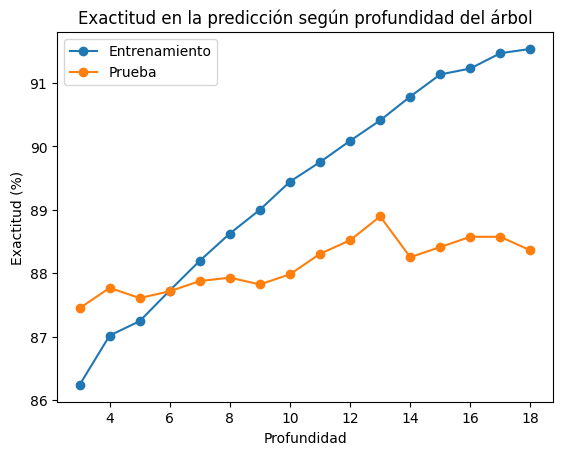

In [ ]:
# Entrenamiento y prueba del modelo con distintos niveles de profundidad
clf = {}
y_pred_train = {}
y_pred_test = {}
exactitud_train = {}
exactitud_test = {}

for p in range(3, 19):
    # Entrenamiento del modelo
    clf[p] = DecisionTreeClassifier(max_depth=p, criterion="entropy", random_state=0).fit(X_train, y_train)

    # Predicción y evaluación sobre el conjunto de entrenamiento
    y_pred_train[p] = clf[p].predict(X_train)
    exactitud_train[p] = accuracy_score(y_train, y_pred_train[p]) * 100

    # Predicción y evaluación sobre el conjunto de prueba
    y_pred_test[p] = clf[p].predict(X_test)
    exactitud_test[p] = accuracy_score(y_test, y_pred_test[p]) * 100

# Crear DataFrame con los valores convertidos a listas
exactitud_df_reduced = pd.DataFrame({
    "Profundidad": list(exactitud_train.keys()),
    "Entrenamiento": list(exactitud_train.values()),
    "Prueba": list(exactitud_test.values())
})

# Graficar los resultados con marker='o'
ax = exactitud_df_reduced.plot(
    x="Profundidad",
    y=["Entrenamiento", "Prueba"],
    marker="o",
    title="Exactitud en la predicción según profundidad del árbol"
)
ax.set_ylabel("Exactitud (%)")

plt.show()


In [ ]:
print(exactitud_df_reduced)

    Profundidad  Entrenamiento     Prueba
0             3      86.237425  87.446352
1             4      87.015426  87.768240
2             5      87.243461  87.607296
3             6      87.726358  87.714592
4             7      88.195842  87.875536
5             8      88.625084  87.929185
6             9      89.000671  87.821888
7            10      89.443327  87.982833
8            11      89.751844  88.304721
9            12      90.087190  88.519313
10           13      90.409121  88.894850
11           14      90.784708  88.251073
12           15      91.133467  88.412017
13           16      91.227364  88.572961
14           17      91.468813  88.572961
15           18      91.535882  88.358369


In [ ]:
# Encontrar la profundidad óptima basada en la máxima exactitud de la prueba
profundidad_optima = exactitud_df_reduced['Prueba'].idxmax()
profundidad_optima

10

#####  **Importancia de las Principales Características en el Modelo Seleccionado**



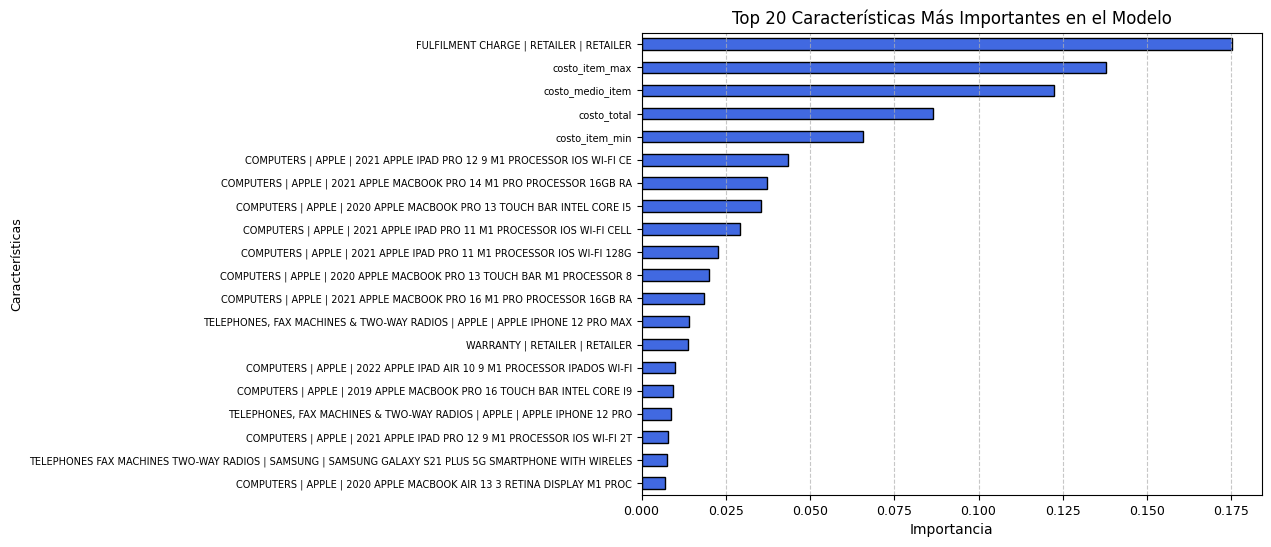

In [ ]:
# Seleccionar el modelo correspondiente a la profundidad óptima
model = clf[profundidad_optima]

# Ordenar importancias de menor a mayor
importancia = pd.Series(model.feature_importances_, index=X.columns)
importancia = importancia.sort_values(ascending=True)

# Seleccionar las 20 características más importantes
top_n = 20
plt.figure(figsize=(8, 6))  # Reducir tamaño del gráfico
importancia.tail(top_n).plot(kind='barh', color='royalblue', edgecolor='black')

# Mejorar el diseño con fuentes más pequeñas
plt.xlabel("Importancia", fontsize=10)
plt.ylabel("Características", fontsize=9)
plt.title(f"Top {top_n} Características Más Importantes en el Modelo", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.xticks(fontsize=9)
plt.yticks(fontsize=7)  # Reducir tamaño del texto en eje Y

plt.show()


#### **Explicación del Gráfico: Importancia de las Características**
- ##### **¿Cómo interpretar el gráfico?**
- **Eje Y**: Nombres de las **20 características más influyentes** en la predicción.  
- **Eje X**: **Importancia relativa** de cada característica en la predicción del modelo.  

---

#####  **Interpretación de las principales características**  
~  **Importancia de las Características en la Predicción**  

-  1. `FULFILMENT CHARGE | RETAILER`  
   Es la **característica más importante**.  
   Sugiere que el **costo de cumplimiento de pedidos** tiene un impacto significativo en la predicción.  

-  2. ` Costos de los Ítems`  
       **Costo medio, costo total, costo máximo y mínimo** son altamente relevantes.  

-  3. `Productos de Apple y Samsung`  
       Modelos específicos como **Computadoras Apple y Teléfonos Apple/Samsung** aparecen en varias posiciones.  
       Indica que ciertos productos son **factores clave** en la predicción.  

-  4. `Otras Variables Influyentes`   
       **Garantía (`WARRANTY | RETAILER`)** y **total de ítems** también impactan en el modelo, aunque en menor medida.   

#### Matriz de confusión y minimización de errores "graves"

**Matriz de confusión**

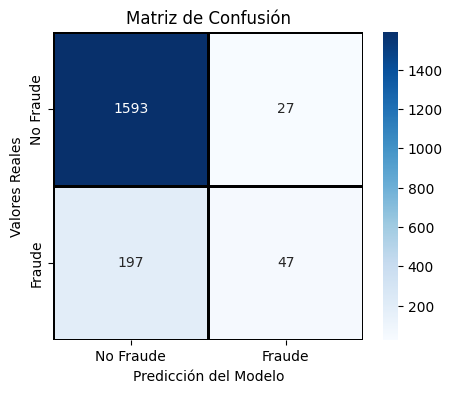

In [ ]:
# Crear la matriz de confusión
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Convertir en DataFrame para mejor visualización
cm_df = pd.DataFrame(cm, index=['No Fraude', 'Fraude'], columns=['No Fraude', 'Fraude'])

# Graficar la matriz de confusión con mejor estilo
plt.figure(figsize=(5,4))  # Ajuste del tamaño
sns.heatmap(cm_df, annot=True, fmt='g', cmap="Blues", linewidths=1, linecolor='black')

# Etiquetas y título
plt.xlabel("Predicción del Modelo")
plt.ylabel("Valores Reales")
plt.title("Matriz de Confusión")
plt.show()


##### **Matriz de Confusión: Evaluación del Modelo de Detección de Fraude**  
* Esta matriz de confusión muestra el desempeño del modelo en la clasificación de transacciones fraudulentas y legítimas.

##### **Resultados**  

|                    | Predicción: No Fraude | Predicción: Fraude |
|--------------------|----------------------|--------------------|
| **Real: No Fraude**  |  1593 (VN)         | x 27 (FP)         |
| **Real: Fraude**    | x 197 (FN)         |  47 (VP)         |

##### Análisis  

- **1593 transacciones** fueron correctamente clasificadas como **No Fraude** (**Verdaderos Negativos - VN**).  
- **47 transacciones fraudulentas** fueron correctamente detectadas (**Verdaderos Positivos - VP**).  
- **27 transacciones No fraude** fueron marcadas erróneamente como fraude (**Falsos Positivos - FP**).  
- **197 fraudes reales** no fueron detectados y se clasificaron como No fraude (**Falsos Negativos - FN**).  


In [ ]:
model.predict(X_test)[0:20]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [ ]:
# Obtener predicciones
y_pred = model.predict(X_test)

# Crear un DataFrame para comparación
df_comparacion = pd.DataFrame({"Real": y_test.to_numpy(), "Predicción": y_pred})

# Mostrar las primeras 20 fila
print(df_comparacion.head(20))


    Real  Predicción
0    0.0         0.0
1    0.0         0.0
2    0.0         0.0
3    0.0         0.0
4    0.0         0.0
5    0.0         0.0
6    0.0         0.0
7    1.0         0.0
8    0.0         0.0
9    1.0         0.0
10   0.0         0.0
11   0.0         0.0
12   0.0         0.0
13   0.0         0.0
14   0.0         0.0
15   0.0         0.0
16   1.0         0.0
17   0.0         0.0
18   0.0         0.0
19   0.0         0.0


#### Establecer el umbral para clasificar transacciones como fraude o no fraude

In [ ]:
# Definir umbral para clasificar como fraude
umbral = 0.15
prediccion_test = np.where(model.predict_proba(X_test)[:, 1] > umbral, 'Fraude', 'No Fraude')

# Mostrar primeras 20 predicciones
print(prediccion_test[:20])

['No Fraude' 'No Fraude' 'No Fraude' 'No Fraude' 'No Fraude' 'No Fraude'
 'No Fraude' 'No Fraude' 'No Fraude' 'Fraude' 'No Fraude' 'No Fraude'
 'No Fraude' 'No Fraude' 'No Fraude' 'No Fraude' 'Fraude' 'No Fraude'
 'No Fraude' 'No Fraude']


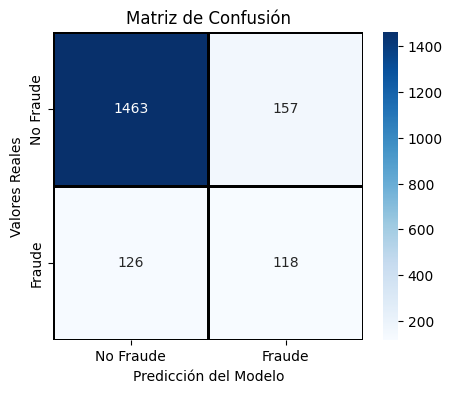

In [ ]:
# Definir umbral y generar predicciones binarias
umbral = 0.3
prediccion_test = (model.predict_proba(X_test)[:, 1] > umbral).astype(int)

# Crear matriz de confusión
conf_matrix = pd.crosstab(y_test, prediccion_test, rownames=['Valores Reales'], colnames=['Predicción del Modelo'])

#  Visualización con barra de color
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", linewidths=2, linecolor='black',
            xticklabels=["No Fraude", "Fraude"], yticklabels=["No Fraude", "Fraude"], cbar=True)  # Se muestra la barra de colores

# Etiquetas y título
plt.xlabel("Predicción del Modelo")
plt.ylabel("Valores Reales")
plt.title("Matriz de Confusión")

plt.show()

##### **Comparación de Matrices de Confusión**

###### Primera Matriz  

|               | **Predicción: No Fraude** | **Predicción: Fraude** |
|--------------|-------------------|------------------|
| **Real: No Fraude**  | 1593 (TN) | 27 (FP) |
| **Real: Fraude**     | 197 (FN)  | 47 ( TP) |

##### **Segunda Matriz  (umbreal 0.3)**

|               | **Predicción: No Fraude** | **Predicción: Fraude** |
|--------------|-------------------|------------------|
| **Real: No Fraude**  | 1463 (TN) | 157 ( FP) |
| **Real: Fraude**     | 126 ( FN)  | 118 (TP) |

---

##### **Comparación Clave**  

| Métrica       | **Primera Matriz** | **Segunda Matriz** |  **Cambio** |
|--------------|----------------|----------------|----------------|
| **Verdaderos Negativos (TN)**  | 1593  | 1463  | 🔽 *Disminuyó* |
| **Falsos Positivos (FP)**      | 27    | 157   | 🔼 *Aumentó*   |
| **Falsos Negativos (FN)**      | 197   | 126   | 🔽 *Disminuyó* |
| **Verdaderos Positivos (TP)**  | 47    | 118   | 🔼 *Aumentó*   |

---

##### **Interpretación**  

**Mejora en la detección de fraudes:**  
- **Aumento en TP** (*47 → 118*): Más fraudes fueron correctamente identificados.  
- **Reducción en FN** (*197 → 126*): Se dejaron pasar menos fraudes sin detectar.  

⚠️ **Mayor costo en transacciones legítimas:**  
- **Aumento en FP** (*27 → 157*): Más transacciones legítimas fueron marcadas erróneamente como fraude.  
- **Disminución en TN** (*1593 → 1463*): Más clientes honestos pueden verse afectados por bloqueos erróneos.  

**Conclusión:**  
El segundo modelo es más agresivo en la detección de fraudes , pero a costa de un mayor número de falsos positivos.  


----------------------------------------

### Bosque Aleatorio

###### Entrenamiento y prueba

In [ ]:
clf_rf = RandomForestClassifier(n_estimators= 1000,  random_state =0,
                                criterion='entropy').fit(X_train, y_train)


y_pred = clf_rf.predict(X_test)
print("Exactitud del modelo Bosque Aleatorio en el conjunto de prueba: {:4.2f}%".format(accuracy_score(y_test, y_pred)*100))

Exactitud del modelo Bosque Aleatorio en el conjunto de prueba: 89.97%


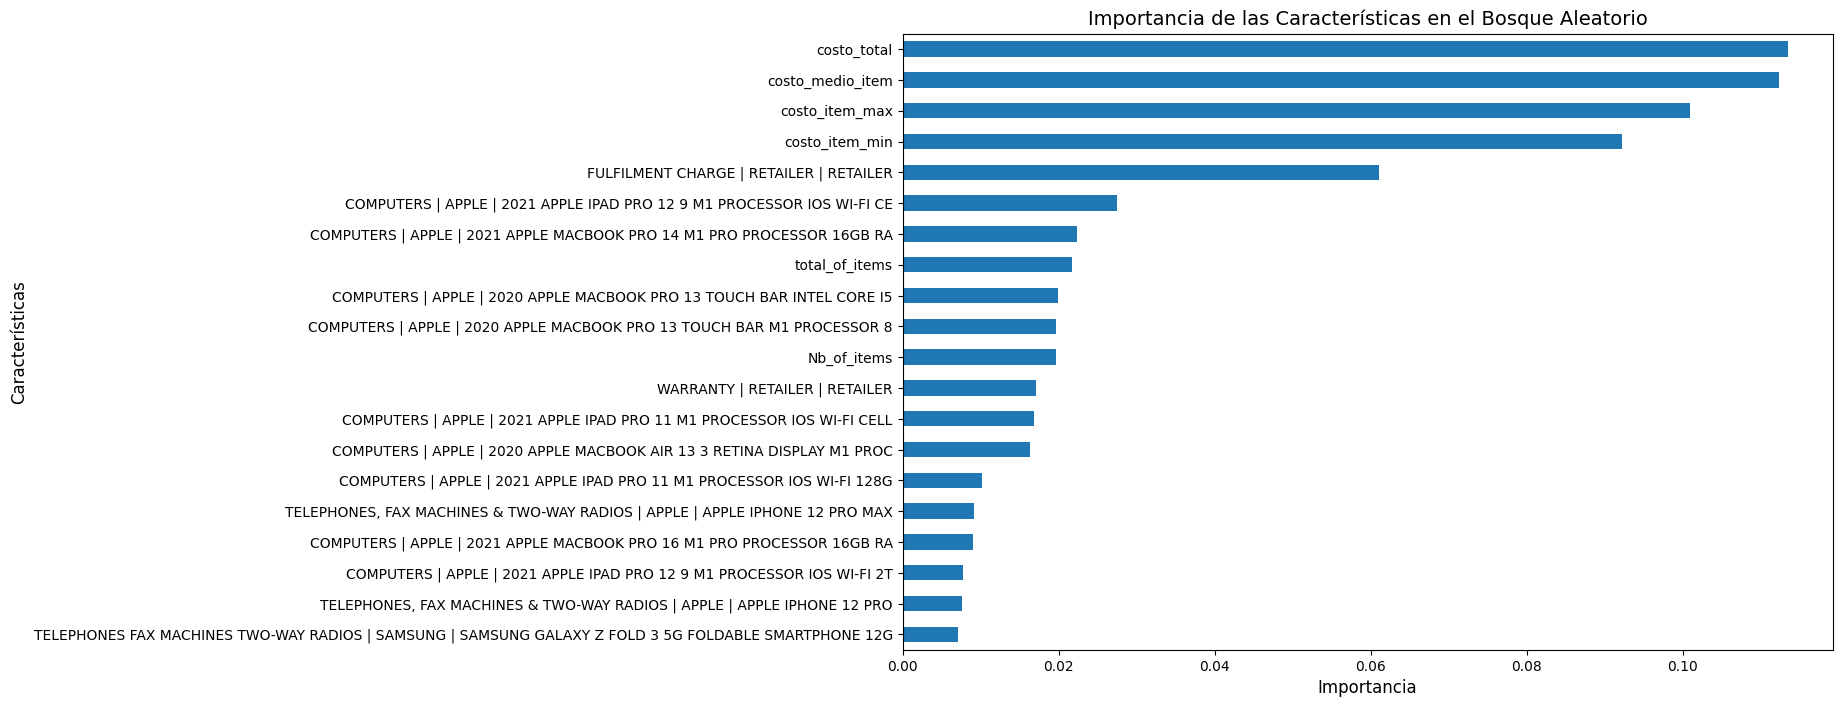

In [ ]:
import matplotlib.pyplot as plt

# Ordenar por importancia
weights = pd.Series(clf_rf.feature_importances_, index=X.columns)
weights = weights.sort_values(ascending=True)  # Ordenar de menor a mayor

# Seleccionar las 20 características más importantes
top_n = 20
weights[-top_n:].plot(kind='barh', figsize=(12, 8), fontsize=10)

plt.xlabel("Importancia", fontsize=12)
plt.ylabel("Características", fontsize=12)
plt.title("Importancia de las Características en el Bosque Aleatorio", fontsize=14)

plt.show()


##### **Importancia de las Características en el Modelo**

- Este análisis muestra qué variables tienen mayor influencia en las predicciones del Bosque Aleatorio.

###### **Orden de Importancia**  

- Las **barras más largas** representan las características con **mayor impacto** en las decisiones del modelo.  
- En el gráfico, las variables más influyentes son:  
  - **`costo_total`**  
  - **`costo_medio_item`**  
  - **`costo_item_max`**  

Estas características tienen un peso significativo en la detección de fraude.

###### **Características Menos Importantes**  

- Las **barras más cortas** indican variables con **menor peso** en la predicción.  
- En este caso, algunos **productos específicos** con nombres largos tienen un **impacto reducido** en el modelo.  

##### **Conclusión**  

El modelo prioriza **variables relacionadas con el costo** para la clasificación de fraudes.  